# Graph Visualization with Python

A **Graph** is a non-linear data structure consisting of *nodes* and *edges*. 

The nodes are sometimes also referred to as vertices and the edges are lines or arcs that connect any two nodes in the graph

The power of graphs is already well known. 
**Graphs** can **represent complex data structures and relationships in various domains**.
For example:
* social networks, 
* recommendation engines, 
* transportation systems,
etc.

[**NetworkX** ](https://networkx.org/)is the well-known Python library for studying graphs and networks.
* is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

But we'll explore a few additional libraries for visualizing graphs in Python:
* [Pyvis](https://pyvis.readthedocs.io/en/latest/tutorial.html)
* Jaal

## Pyvis

The pyvis library is meant for quick generation of visual network graphs with minimal python code. 

### Installation

Install with pip:

`$ pip install pyvis`

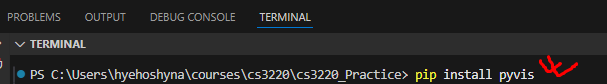

In [ ]:
from pyvis.network import Network #All networks must be instantiated as a Network class instance

Let's add **[Pandas](https://pandas.pydata.org/)** - a data manipulation package in Python for tabular data. 

[Python pandas Tutorial: The Ultimate Guide for Beginners](https://www.datacamp.com/tutorial/pandas)

Installing pandas is straightforward; just use the pip install command in your terminal:

`$ pip install pandas`

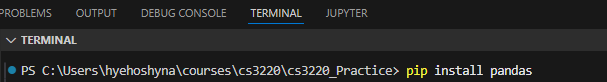

In [ ]:
import pandas as pd #To begin working with pandas, import the pandas Python package 

### Example 1: social network visualizing

Let’s visualize an actual social network. We’ll use a dataset containing [Facebook friend lists](https://snap.stanford.edu/data/ego-Facebook.html)

In [5]:
#Loading the data
data = pd.read_csv("data/facebook_combined.txt", sep=" ", header=None)
print(data.size) #this dataset is quite big 

176468


In [6]:
data.head(5)

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [7]:
data.tail(5)

,0,1
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038
88233,4031,4038


In [22]:
data.iloc[:,0].unique().size # N-of persons 

3663

Let's limit our visualization to 100 samples

In [45]:
sample = data.sample(100, random_state = 1)

In [46]:
sample.head(5)

,0,1
74346,2839,3064
62630,2309,2590
199,0,200
51398,2088,2468
27375,1319,1568


In [47]:
sample.columns = ["person1", "person2"]
sample.head(3)

,person1,person2
74346,2839,3064
62630,2309,2590
199,0,200


To construct a **network graph**, start by creating an **instance of the Network object**.

In [108]:
net = Network(notebook = True, cdn_resources = "remote", #  For visualization within a notebook
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
)

We'll set the nodes to be a unique list of people 

In [31]:
import numpy as np

In [49]:
type(sample['person1'].values)

numpy.ndarray

In [109]:
#nodes = list(set([sample['person1'].values,sample['person2'].values]))
nodes=np.unique(np.concatenate((sample['person1'].values,sample['person2'].values),0))
nodes

array([   0,   26,   55,   67,  104,  107,  123,  200,  277,  304,  334,
        348,  369,  391,  433,  474,  515,  525,  566,  582,  627,  686,
        697,  724,  792,  810,  823,  824,  837,  931,  954,  966, 1024,
       1029, 1047, 1076, 1078, 1107, 1126, 1164, 1171, 1179, 1188, 1228,
       1238, 1256, 1269, 1287, 1304, 1313, 1319, 1330, 1352, 1361, 1409,
       1420, 1436, 1444, 1470, 1509, 1534, 1539, 1559, 1568, 1576, 1589,
       1613, 1622, 1663, 1683, 1684, 1699, 1709, 1715, 1718, 1741, 1778,
       1783, 1809, 1831, 1839, 1843, 1888, 1898, 1902, 1912, 1918, 1929,
       1936, 1943, 1962, 1982, 1983, 2045, 2054, 2056, 2058, 2088, 2095,
       2108, 2111, 2125, 2152, 2154, 2180, 2222, 2223, 2233, 2237, 2266,
       2289, 2290, 2292, 2300, 2309, 2329, 2340, 2386, 2458, 2462, 2463,
       2468, 2492, 2511, 2512, 2520, 2521, 2537, 2543, 2551, 2559, 2589,
       2590, 2642, 2644, 2653, 2665, 2674, 2676, 2705, 2708, 2712, 2778,
       2796, 2824, 2839, 2849, 2853, 2881, 2896, 29

In [51]:
net.add_nodes(nodes)

When using the `network.Network.add_nodes()` method optional keyword arguments can be passed in to add properties to these nodes as well. 

The valid properties in this case are: ['size', 'value', 'title', 'x', 'y', 'label', 'color']

In [110]:
nodes.size

195

In [111]:
# rebuild the graph from the very beginning
net.add_nodes(nodes, title=[""]*nodes.size)

We use the values of each row as source and destination nodes for each relationship

In [112]:
edges = sample.values.tolist()
edges[:5]

[[2839, 3064], [2309, 2590], [0, 200], [2088, 2468], [1319, 1568]]

In [113]:
len(edges)

100

In [114]:
net.add_edges(edges)

In [59]:
from IPython.display import display, HTML

In [63]:
net.show("graph.html")
#display(HTML('graph.html'))

graph.html


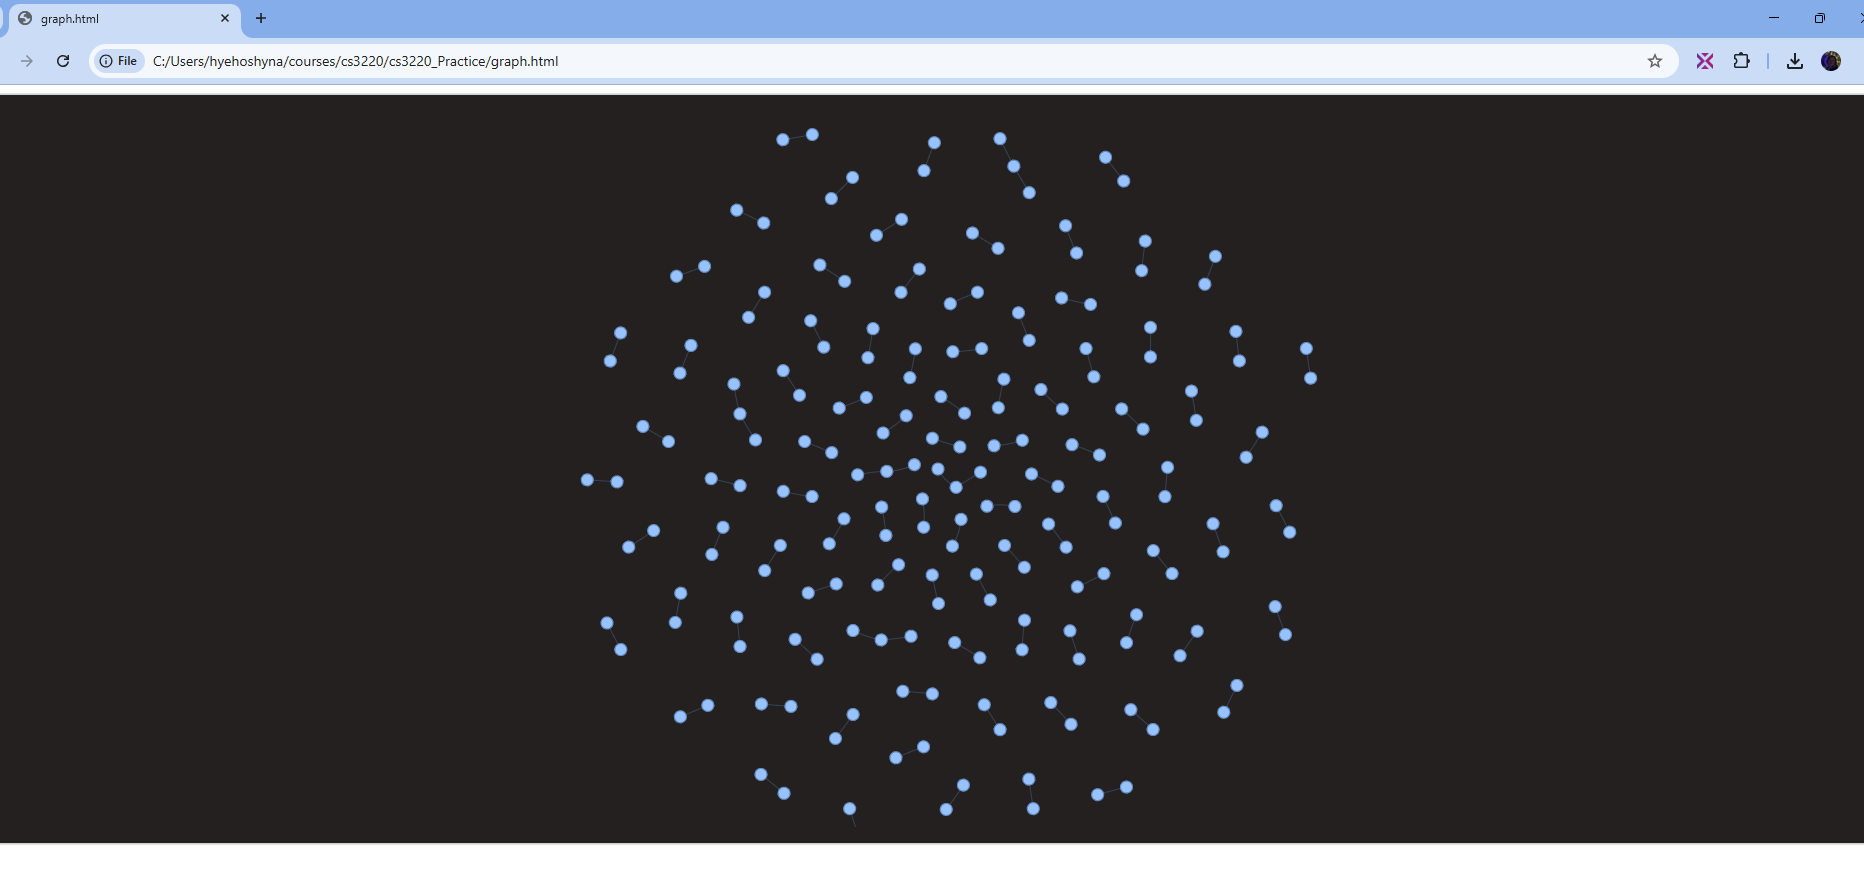

In [ ]:

neighbor_map = net.get_adj_list()
neighbor_map

{0: {200},
 26: {55},
 55: {26},
 67: {304},
 104: {277},
 107: {1699},
 123: {334},
 200: {0},
 277: {104},
 304: {67},
 334: {123},
 348: {474, 525},
 369: {433},
 391: {515},
 433: {369},
 474: {348},
 515: {391},
 525: {348},
 566: {1313},
 582: {627},
 627: {582},
 686: {810},
 697: {824},
 724: {823},
 792: {837},
 810: {686},
 823: {724},
 824: {697},
 837: {792},
 931: {1831},
 954: {1783},
 966: {1024},
 1024: {966},
 1029: {1613},
 1047: {1420},
 1076: {1539},
 1078: {1843},
 1107: {1888},
 1126: {1269},
 1164: {1663},
 1171: {1534},
 1179: {1778},
 1188: {1228},
 1228: {1188},
 1238: {1330},
 1256: {1898},
 1269: {1126},
 1287: {1559},
 1304: {1709},
 1313: {566},
 1319: {1568},
 1330: {1238},
 1352: {1683},
 1361: {1589},
 1409: {1470},
 1420: {1047},
 1436: {1444},
 1444: {1436},
 1470: {1409},
 1509: {1839},
 1534: {1171},
 1539: {1076},
 1559: {1287},
 1568: {1319},
 1576: {1715},
 1589: {1361},
 1613: {1029},
 1622: {1902},
 1663: {1164},
 1683: {1352},
 1684: {2978},
 

https://www.askpython.com/python/examples/customizing-pyvis-interactive-network-graphs

In [116]:
# add neighbor data to node hover data
for node in net.nodes:
    node["title"] += "Neighbors:" + "#".join(str(x) for x in neighbor_map[node["id"]])
    

In [117]:
net.show("graph1.html")

graph1.html
